# **SVM**

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
mush=pd.read_csv('mushroom.csv')
mush

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


### EDA

In [3]:
# Removing unwanted column
mush=mush.drop(['Unnamed: 0'],axis=1)
mush.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
mush.shape

(2000, 25)

In [5]:
mush.columns


Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [6]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [7]:
# printing all the values and counts for each variable

for column in mush.columns:
  print(f"Values and counts for column '{column}':")
  print(mush[column].value_counts())
  print("\n")

Values and counts for column 'cap_shape':
cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64


Values and counts for column 'cap_surface':
cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64


Values and counts for column 'cap_color':
cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: count, dtype: int64


Values and counts for column 'bruises':
bruises
yes    1023
no      977
Name: count, dtype: int64


Values and counts for column 'odor':
odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64


Values and counts for column 'gill_attachment':
gill_attachment
free          540
notched       535
attached      487
descending    438
Name: count, dtype: int64


Values and counts

In [8]:
#check for null values
mush.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

There are no null values

### Data Visualization

In [9]:
#defining numerical vraiables
mush_num=mush.drop(mush.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]],axis=1)
mush_num

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


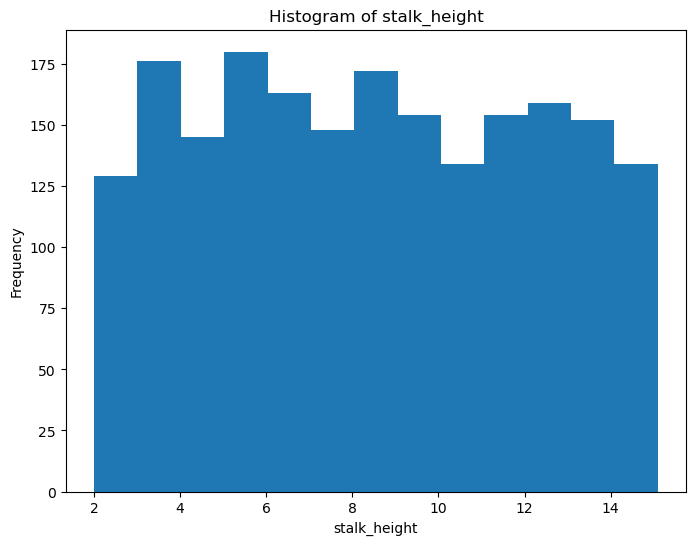

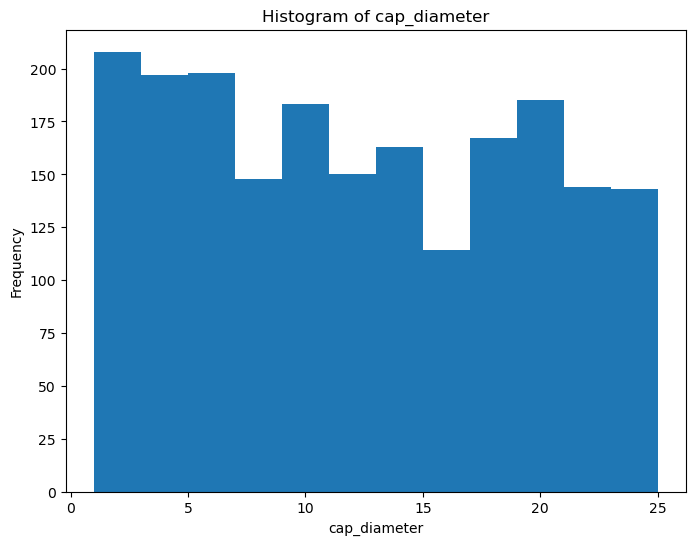

In [10]:
# histograms of all numerical variables

for col in mush_num.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(mush_num[col], bins='auto')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

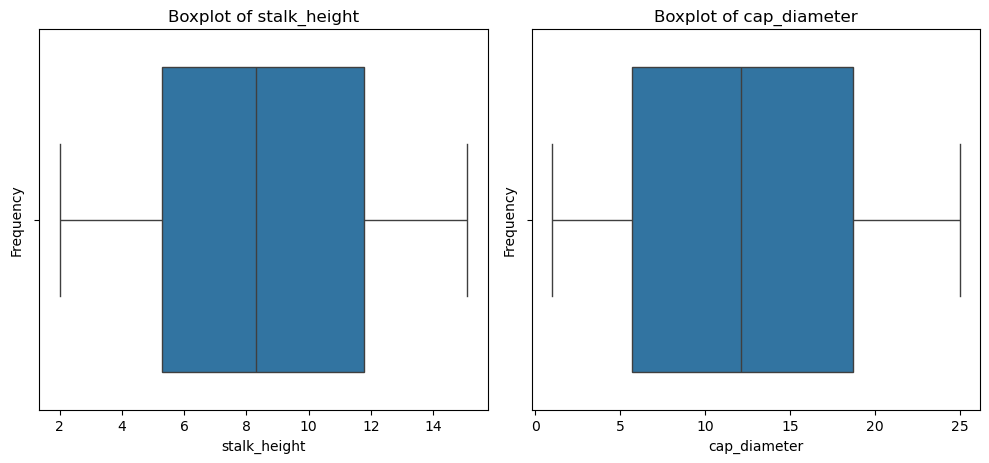

In [11]:
# BOXPLOT TO CHECK OUTLIERS
plt.figure(figsize = (10,35))
for i, column in enumerate( mush_num,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = mush_num[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are no outliers

In [12]:
#Defining categorical variables
mush_cat=mush.drop(mush.columns[[23,24]],axis=1)
mush_cat

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous


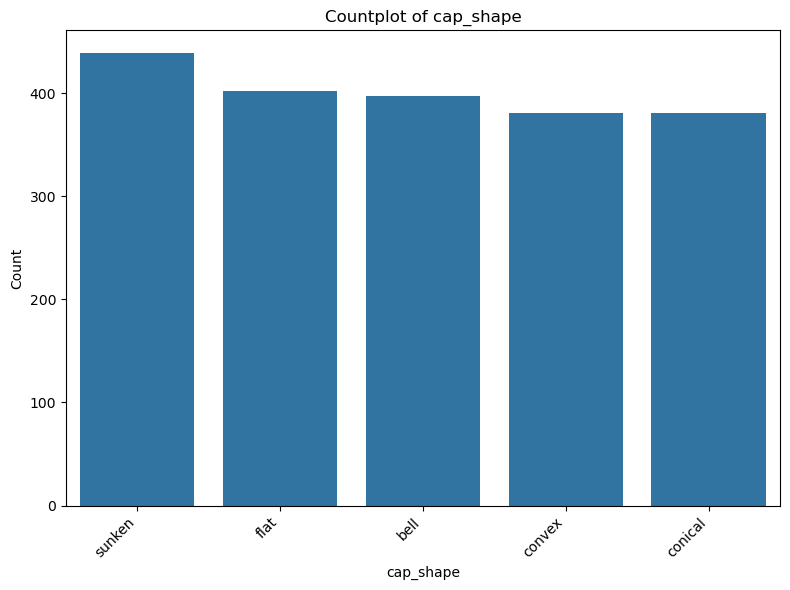

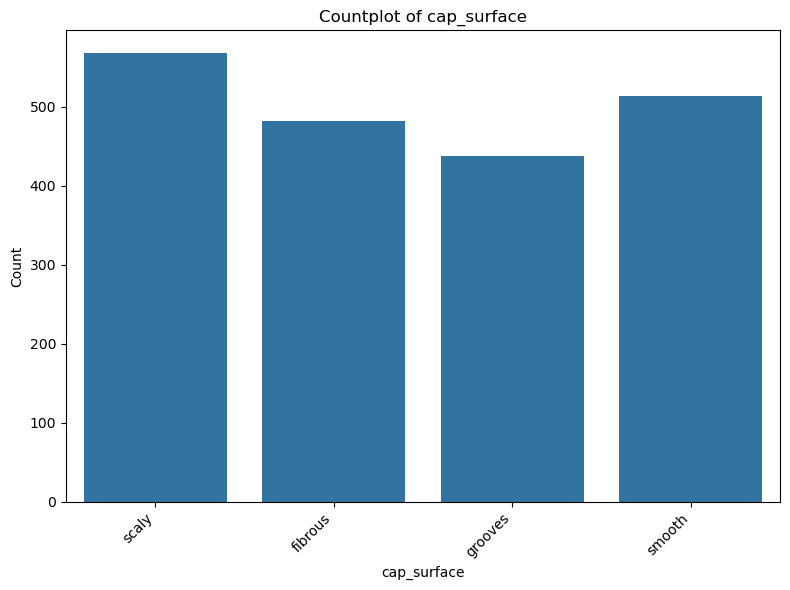

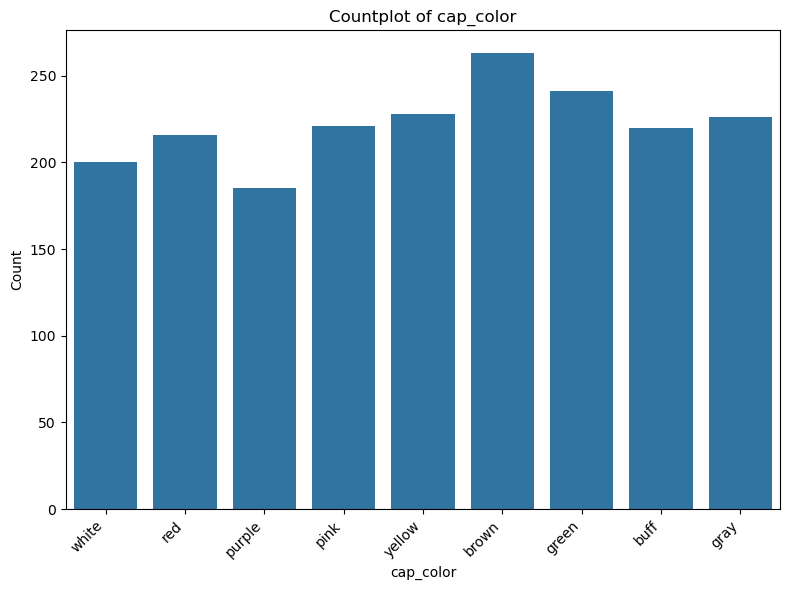

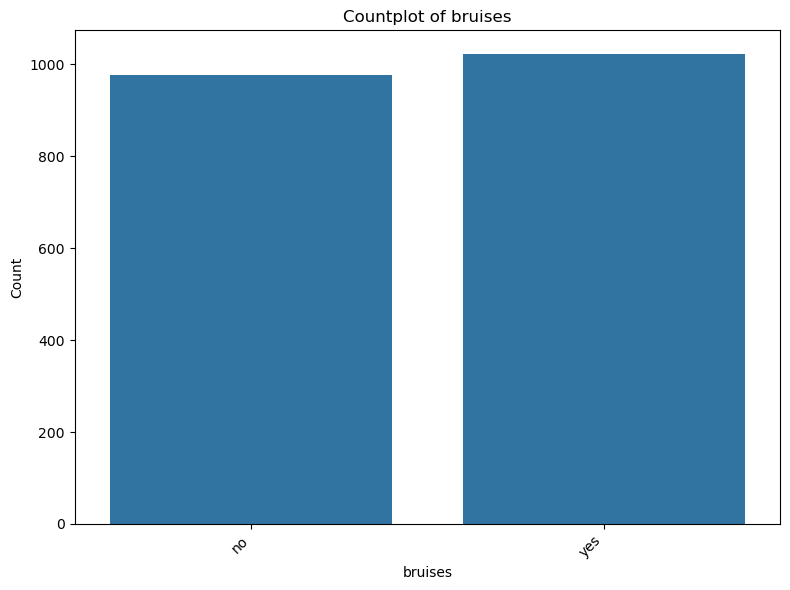

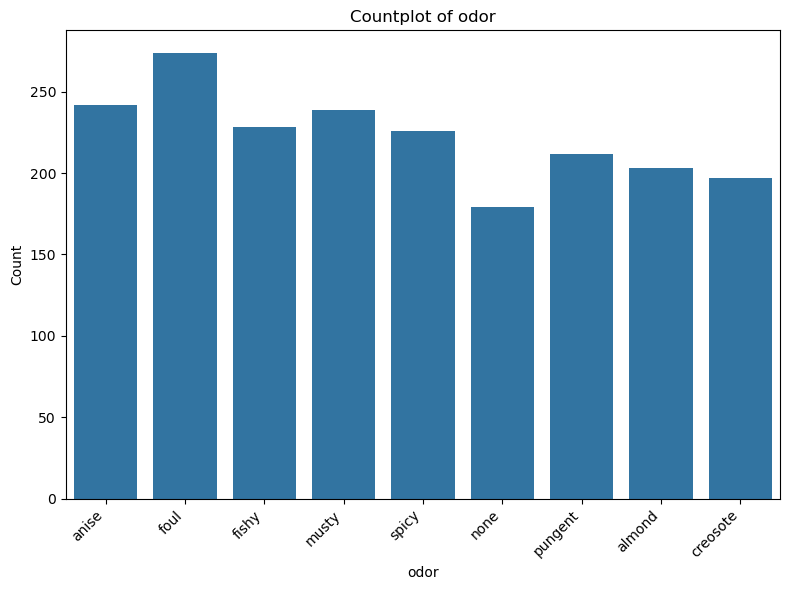

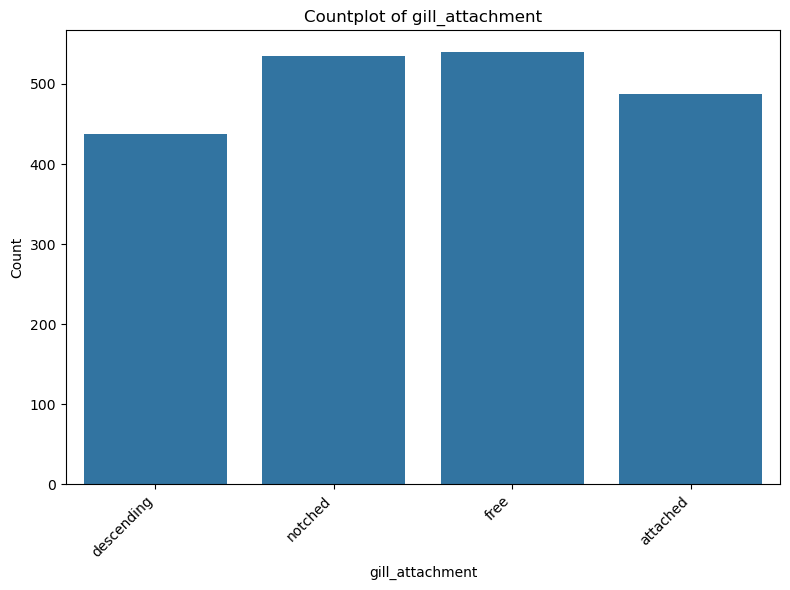

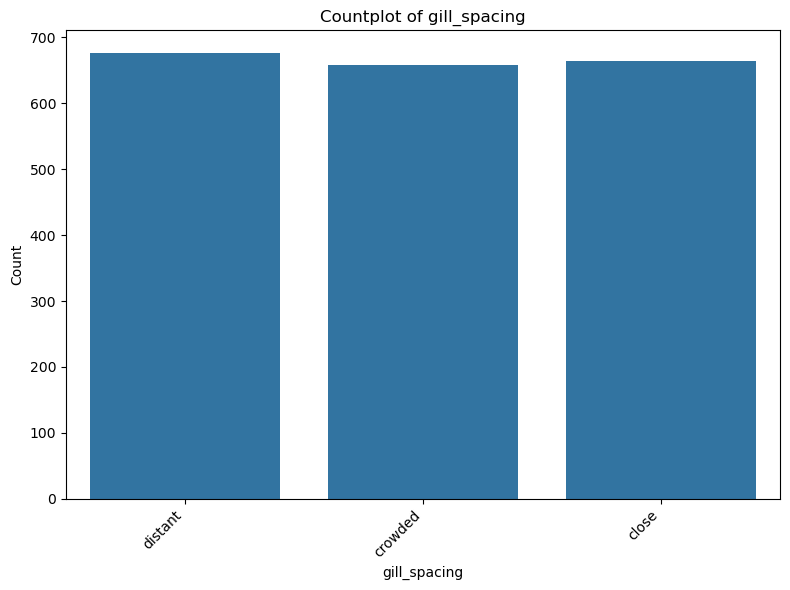

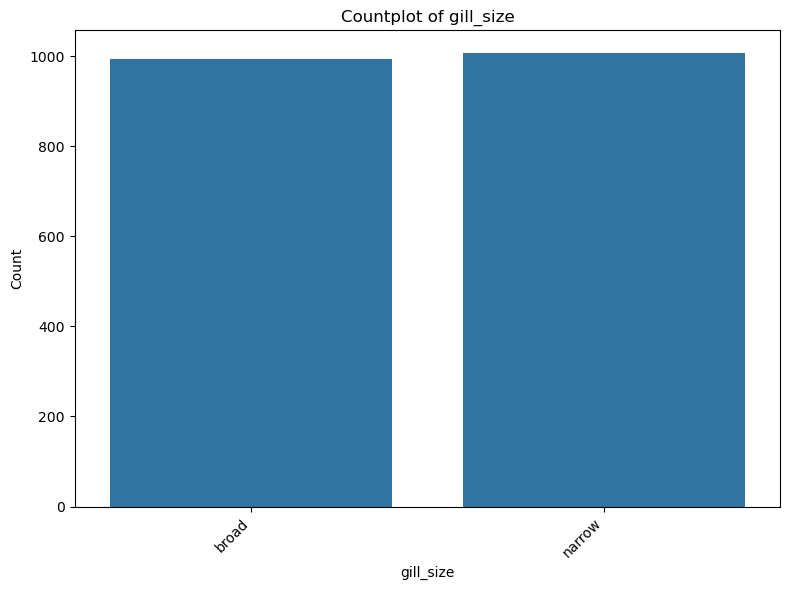

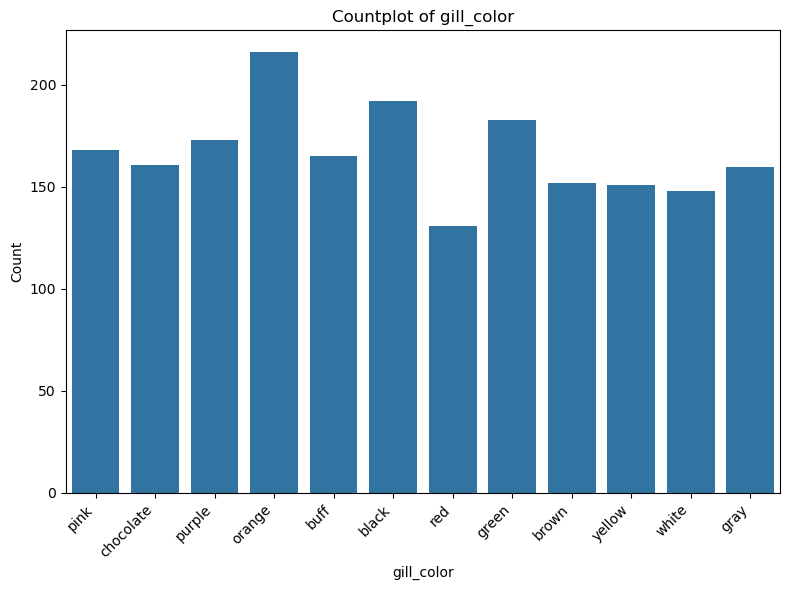

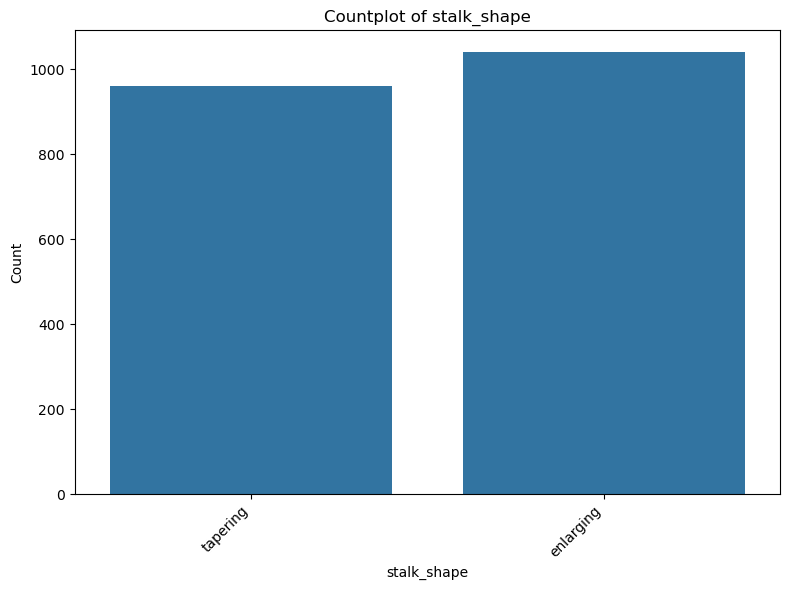

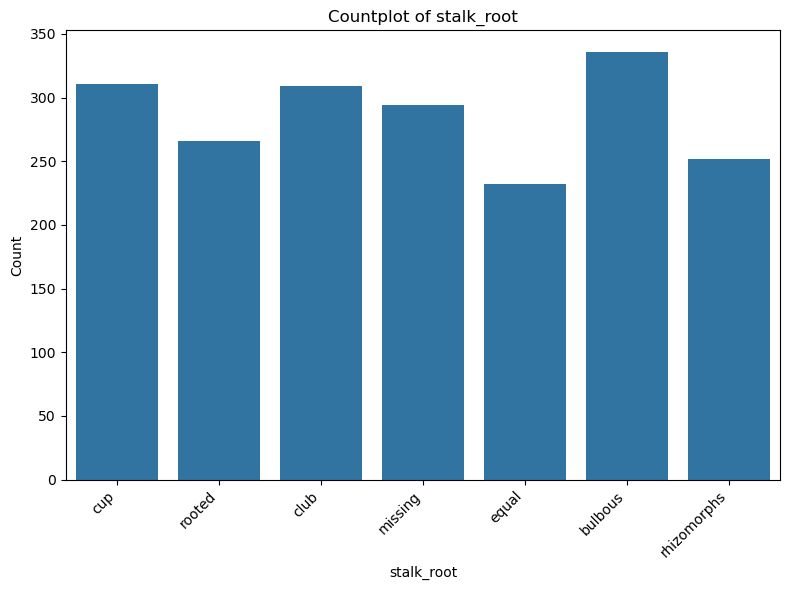

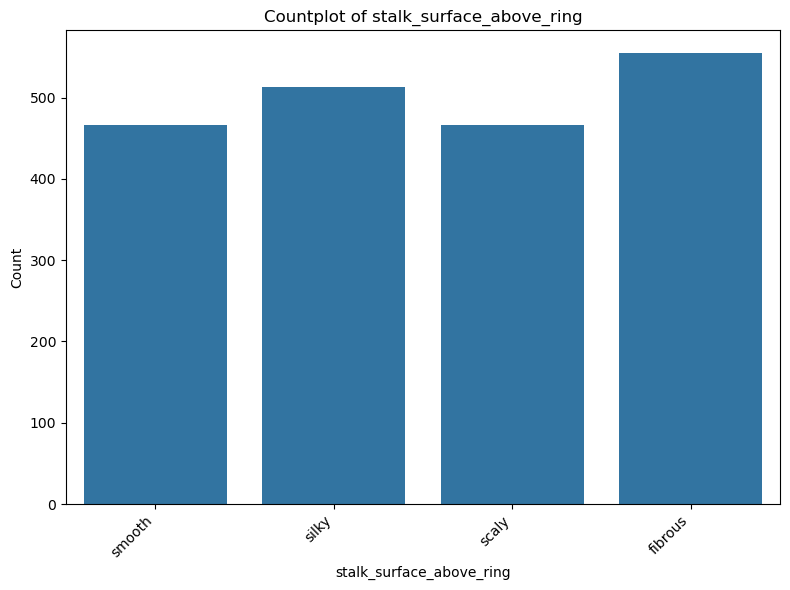

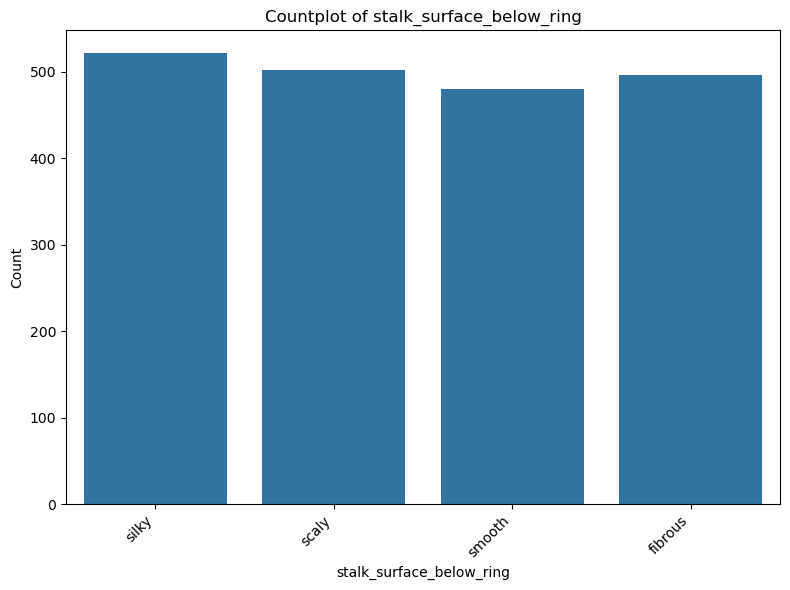

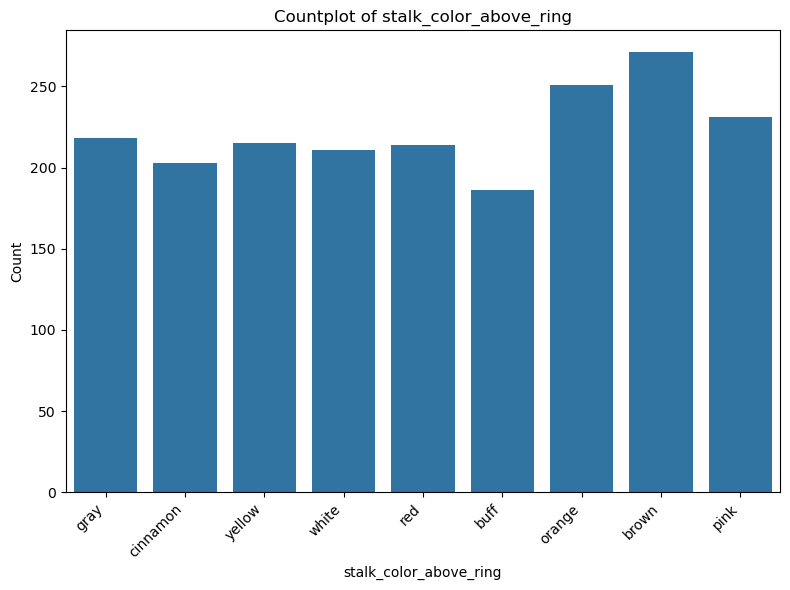

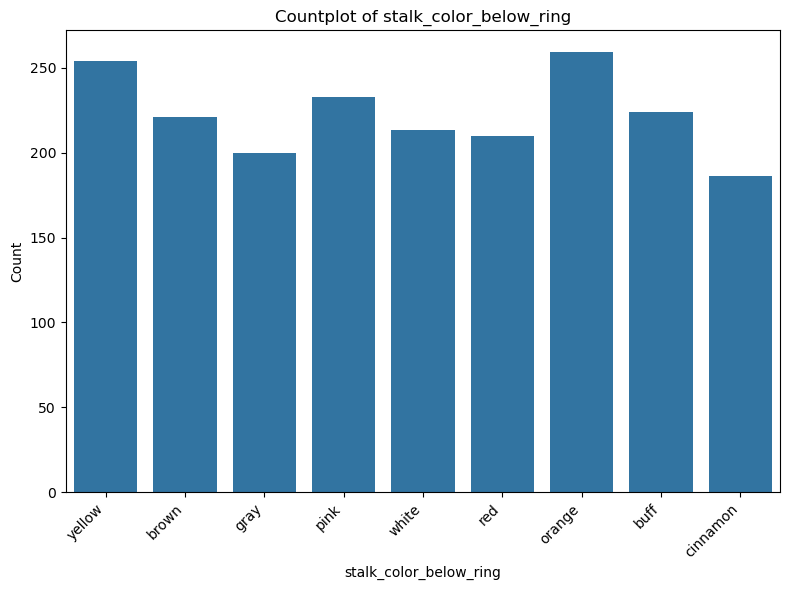

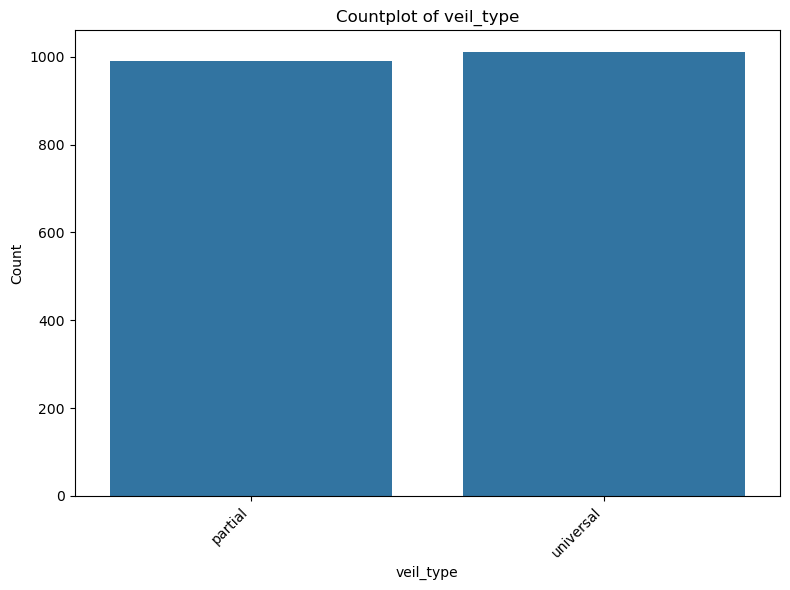

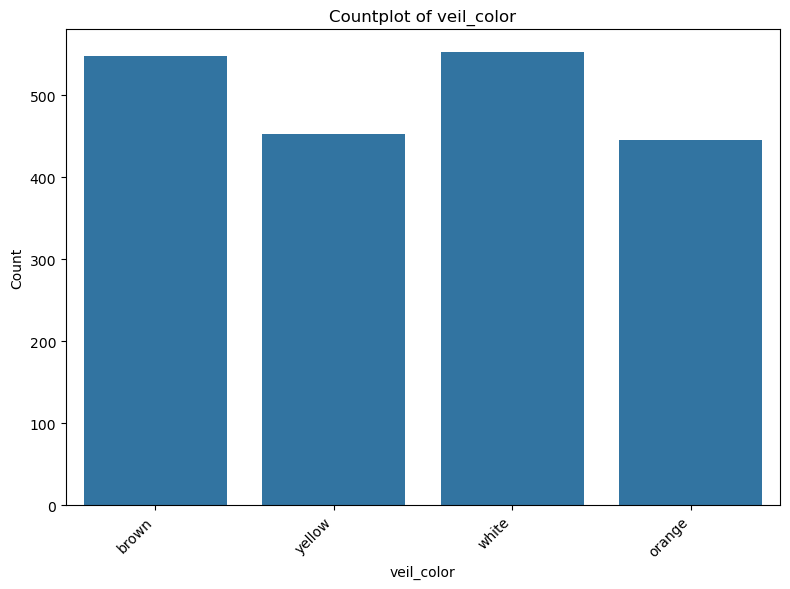

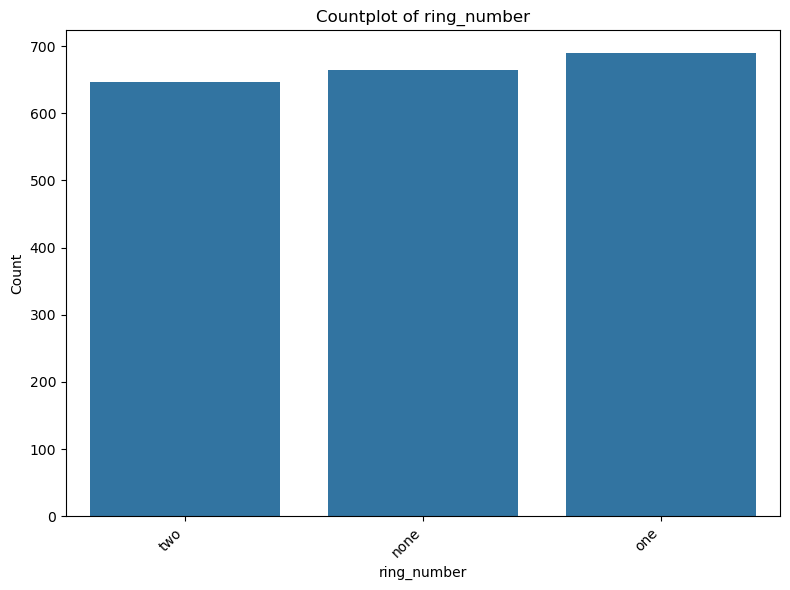

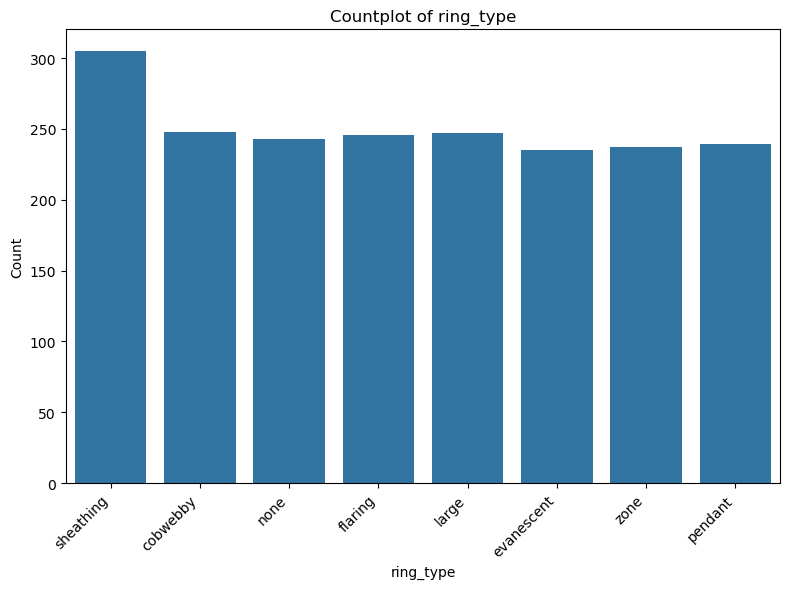

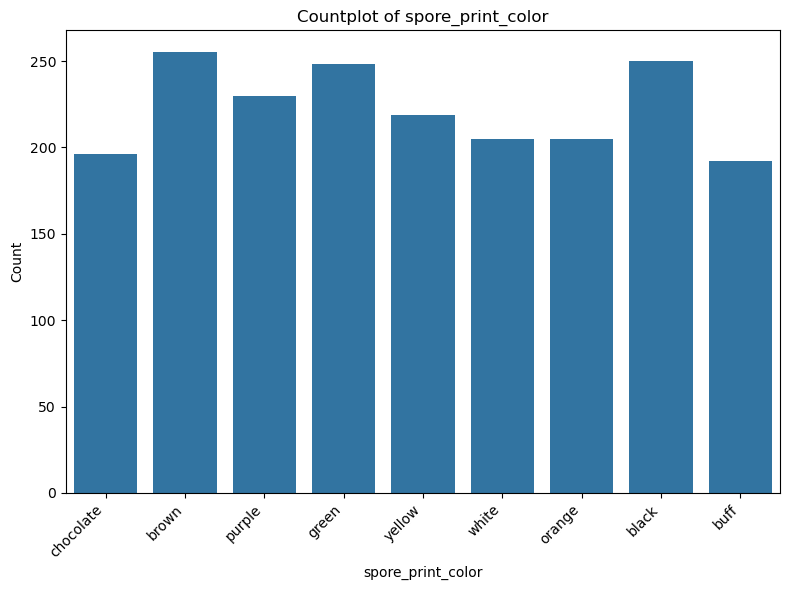

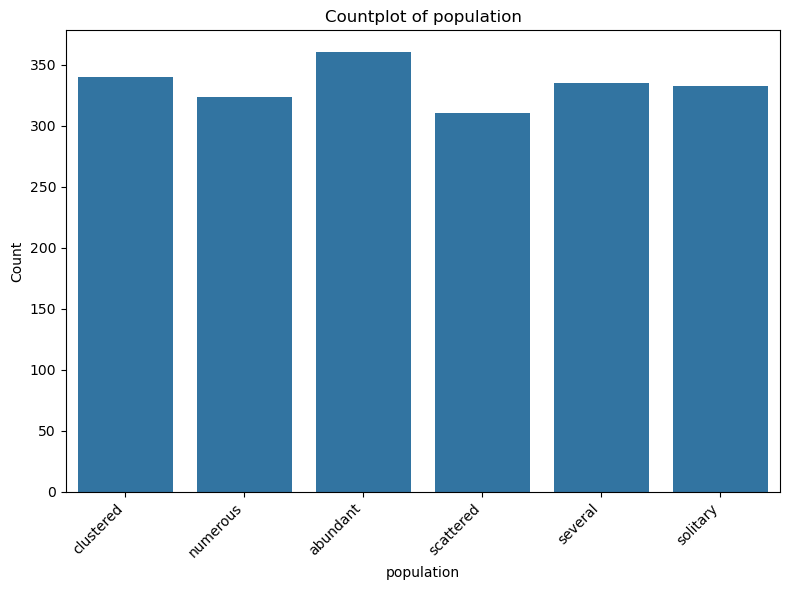

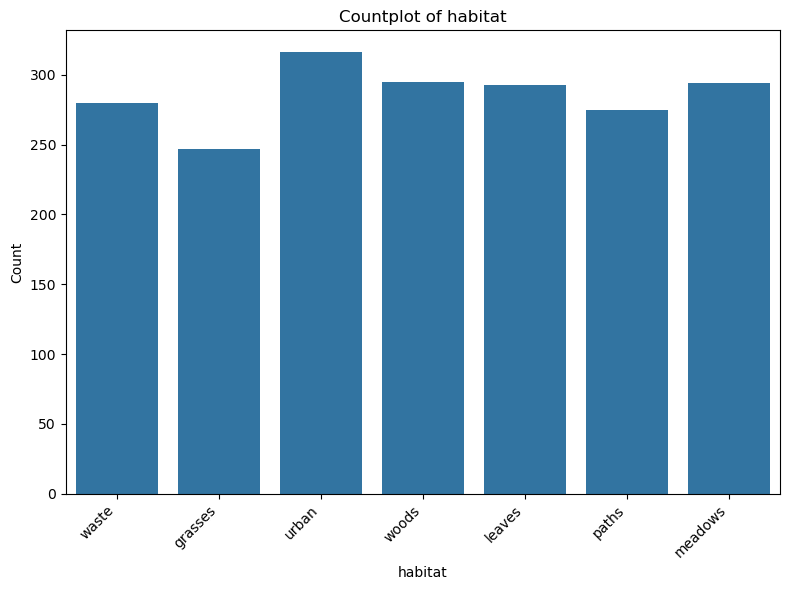

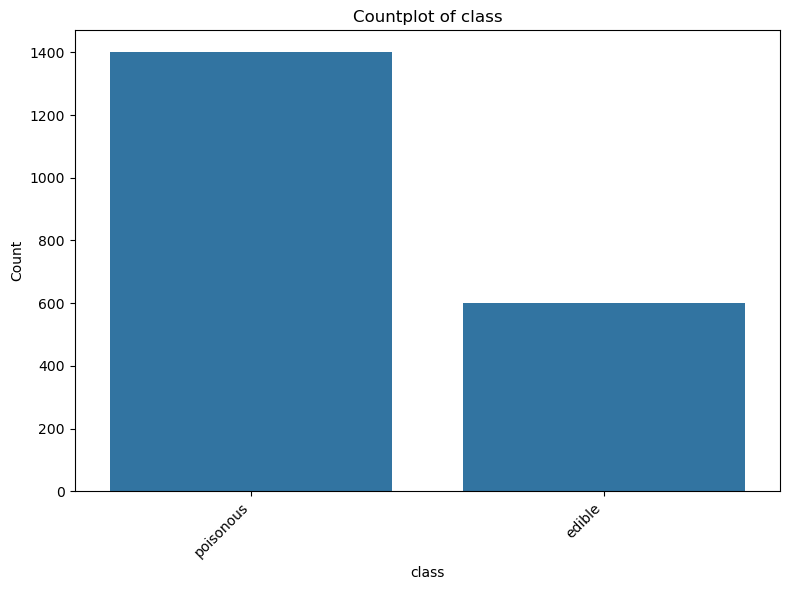

In [13]:
#count plots of the values of all categorical variables

for col in mush_cat.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=mush_cat[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

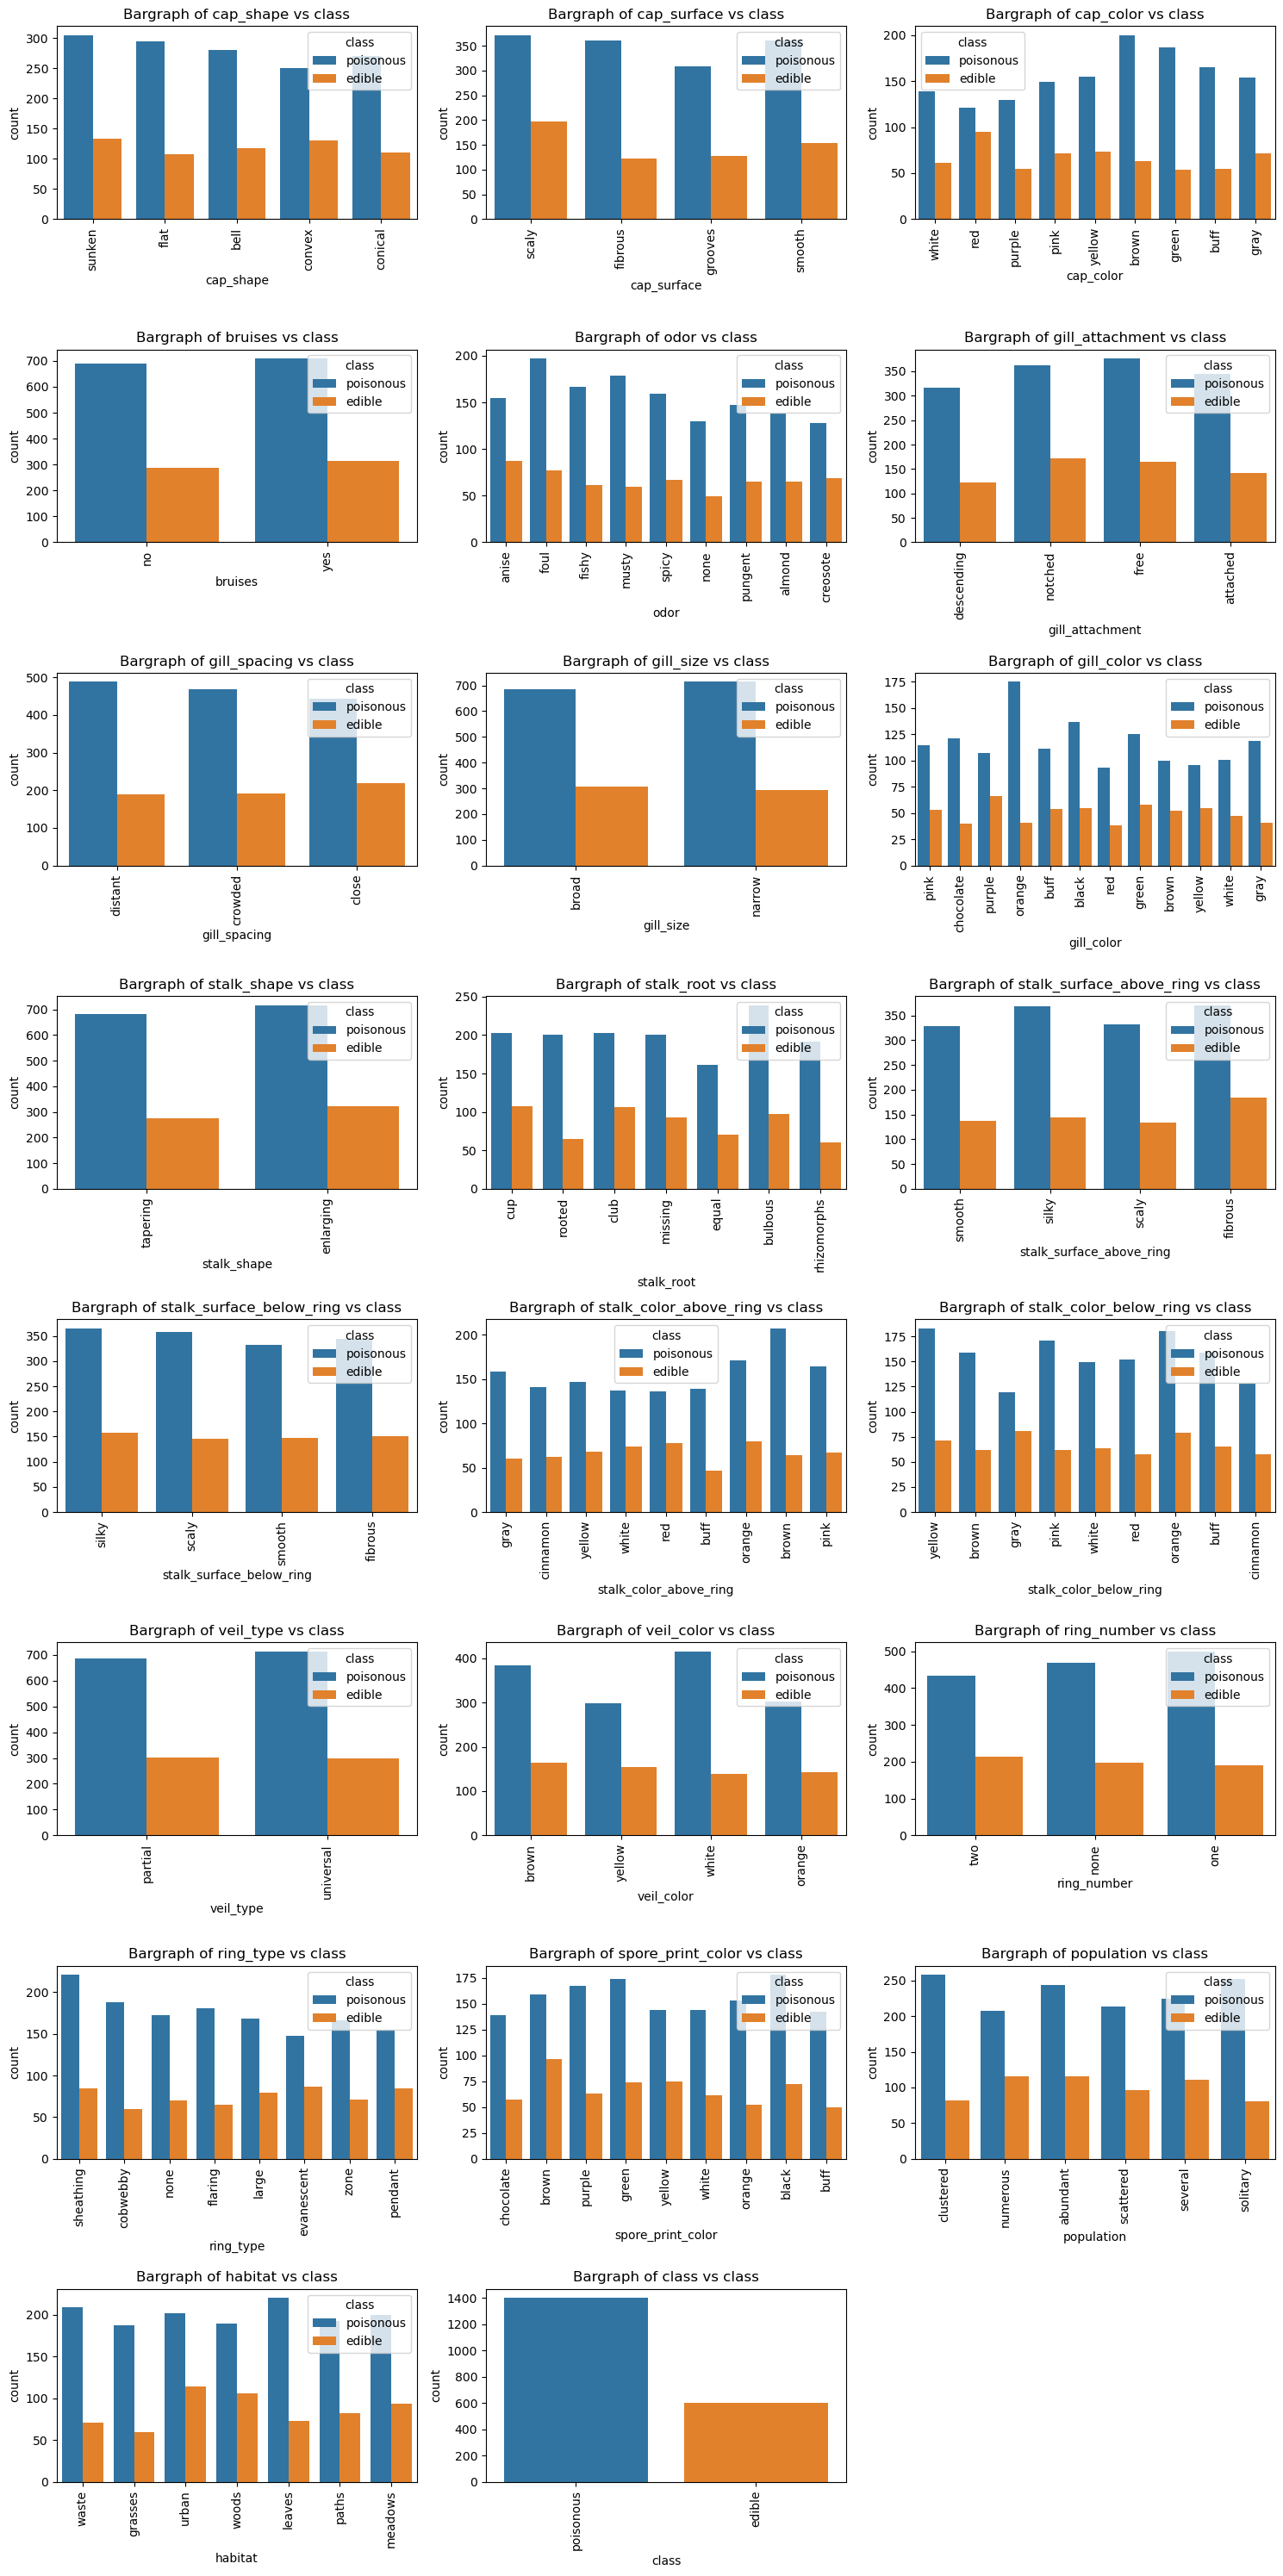

In [14]:
# multivariate plot of all variables with class variable


plt.figure(figsize=(15, 30))

# Calculate the number of rows and columns needed for subplots
num_cols = len(mush_cat.columns)
num_rows = (num_cols + 2) // 3

for i, col in enumerate(mush_cat.columns):
    # Use num_rows and 3 in the subplot command
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, hue='class', data=mush_cat)
    plt.xticks(rotation=90)
    plt.title(f'Bargraph of {col} vs class')

plt.tight_layout()
plt.show()

From EDA we can see **'bruises','gill_size', 'stalk_shape', 'stalk_surface_below_ring', 'veil_type'** have very less variance and almost of  similar values. So they will not be much useful in model fitting.

Therefoe dropping these variables for reducing model complexity.

In [15]:
mush_cat=mush_cat.drop(['bruises','gill_size', 'stalk_shape', 'stalk_surface_below_ring', 'veil_type' ],axis=1)
mush_cat

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,anise,descending,distant,pink,cup,smooth,gray,yellow,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,anise,notched,crowded,chocolate,rooted,silky,cinnamon,brown,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,foul,descending,crowded,purple,cup,scaly,yellow,gray,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,fishy,notched,close,orange,club,smooth,yellow,pink,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,musty,free,crowded,orange,missing,fibrous,gray,white,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,foul,attached,crowded,chocolate,bulbous,silky,pink,orange,orange,one,flaring,purple,abundant,leaves,poisonous
1996,sunken,scaly,purple,musty,attached,distant,red,rhizomorphs,fibrous,pink,orange,white,one,zone,yellow,numerous,waste,poisonous
1997,convex,grooves,green,fishy,notched,close,pink,missing,smooth,brown,red,brown,two,evanescent,yellow,abundant,woods,poisonous
1998,bell,smooth,white,pungent,free,close,orange,rooted,scaly,gray,pink,yellow,one,cobwebby,brown,solitary,woods,poisonous


In [16]:
mush_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 2000 non-null   object
 1   cap_surface               2000 non-null   object
 2   cap_color                 2000 non-null   object
 3   odor                      2000 non-null   object
 4   gill_attachment           2000 non-null   object
 5   gill_spacing              2000 non-null   object
 6   gill_color                2000 non-null   object
 7   stalk_root                2000 non-null   object
 8   stalk_surface_above_ring  2000 non-null   object
 9   stalk_color_above_ring    2000 non-null   object
 10  stalk_color_below_ring    2000 non-null   object
 11  veil_color                2000 non-null   object
 12  ring_number               2000 non-null   object
 13  ring_type                 2000 non-null   object
 14  spore_print_color       

### Data Preprocessing

In [17]:
# standardize numerical variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Age', 'Fare', and 'Ticket' columns
mush_num[['stalk_height', 'cap_diameter',]] = scaler.fit_transform(mush_num[['stalk_height', 'cap_diameter']])

# Print the updated DataFrame
mush_num.head()

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765


In [18]:
# label encode all the categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate through each column
for col in mush_cat.columns:
    # Fit and transform the column using LabelEncoder
    mush_cat[col] = le.fit_transform(mush_cat[col])

mush_cat.head()

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,1,1,2,7,2,3,3,8,0,2,6,3,1,5,1
1,4,0,6,1,3,1,3,6,2,2,0,0,2,6,1,2,5,0
2,3,1,5,4,1,1,8,2,1,8,3,3,2,6,6,0,5,1
3,0,2,4,3,3,0,6,1,3,8,5,3,2,0,4,1,0,1
4,3,3,8,5,2,1,6,4,0,3,7,2,0,4,8,1,4,1


In [19]:
#final dataframe
mush_fin=pd.concat([mush_cat,mush_num],axis=1)
mush_fin

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,1,1,2,7,2,3,3,8,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,1,3,1,3,6,2,2,0,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,4,1,1,8,2,1,8,3,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,3,3,0,6,1,3,8,5,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,5,2,1,6,4,0,3,7,2,0,4,8,1,4,1,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,4,0,1,3,0,2,5,4,1,1,2,6,0,1,1,-0.695623,0.730771
1996,4,2,5,5,0,2,9,5,0,5,4,2,1,7,8,2,5,1,-0.527090,0.168525
1997,2,1,3,3,3,0,7,4,3,0,6,0,2,1,8,0,6,1,1.382181,-0.148193
1998,0,3,7,7,2,0,6,6,1,3,5,3,1,0,1,5,6,1,0.715199,-0.552164


In [20]:
# count of all variables in final dataframe
for column in mush_fin.columns:
  print(f"Values and counts for column '{column}':")
  print(mush_fin[column].value_counts())
  print("\n")

Values and counts for column 'cap_shape':
cap_shape
4    439
3    402
0    397
2    381
1    381
Name: count, dtype: int64


Values and counts for column 'cap_surface':
cap_surface
2    568
3    513
0    482
1    437
Name: count, dtype: int64


Values and counts for column 'cap_color':
cap_color
0    263
3    241
8    228
2    226
4    221
1    220
6    216
7    200
5    185
Name: count, dtype: int64


Values and counts for column 'odor':
odor
4    274
1    242
5    239
3    228
8    226
7    212
0    203
2    197
6    179
Name: count, dtype: int64


Values and counts for column 'gill_attachment':
gill_attachment
2    540
3    535
0    487
1    438
Name: count, dtype: int64


Values and counts for column 'gill_spacing':
gill_spacing
2    677
0    664
1    659
Name: count, dtype: int64


Values and counts for column 'gill_color':
gill_color
6     216
0     192
5     183
8     173
7     168
2     165
3     161
4     160
1     152
11    151
10    148
9     131
Name: count, dtype: int64




### Data Transformation and Model Fitting

In [21]:
#define X and Y
X = mush_fin.drop(columns=['class'])
Y = mush_fin['class']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int32

In [22]:
X.head()

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,1,1,2,7,2,3,3,8,0,2,6,3,1,5,1.576459,-1.030123
1,4,0,6,1,3,1,3,6,2,2,0,0,2,6,1,2,5,-1.216463,0.958407
2,3,1,5,4,1,1,8,2,1,8,3,3,2,6,6,0,5,0.163717,-0.724904
3,0,2,4,3,3,0,6,1,3,8,5,3,2,0,4,1,0,-0.871852,1.222967
4,3,3,8,5,2,1,6,4,0,3,7,2,0,4,8,1,4,1.511897,0.032765


In [23]:
X.shape

(2000, 19)

In [24]:
Y.shape

(2000,)

In [25]:
#fitting the model ----> Basic SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, gamma='scale')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [26]:
# predictions and evaluation
Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy:", np.round(train_accuracy,2))
print("Testing Accuracy:", np.round(test_accuracy,2))

Training Accuracy: 0.71
Testing Accuracy: 0.67


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# cross validation ---> SVM-linear
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,51):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = SVC(C=1.0,kernel='linear',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validation test accuracy: ",np.round(np.mean(test_acc),2))

Cross validation training accuracy:  0.7
Cross validation test accuracy:  0.7


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))
from sklearn.metrics import precision_score


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.64      1.00      0.78       256

    accuracy                           0.64       400
   macro avg       0.32      0.50      0.39       400
weighted avg       0.41      0.64      0.50       400



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# cross validation  --> SVM-polynomial
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = SVC(degree=4,kernel='poly',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))

Cross validatin training accuracy:  0.91
Cross validatin test accuracy:  0.8


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.51      0.63       144
           1       0.77      0.95      0.85       256

    accuracy                           0.79       400
   macro avg       0.81      0.73      0.74       400
weighted avg       0.80      0.79      0.77       400



In [34]:
# cross validation  --> SVM-radialbasis function
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = SVC(kernel='rbf',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))

Cross validatin training accuracy:  0.73
Cross validatin test accuracy:  0.71


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07       144
           1       0.65      1.00      0.79       256

    accuracy                           0.65       400
   macro avg       0.82      0.52      0.43       400
weighted avg       0.77      0.65      0.53       400



**Verdict:**
Through experimentation with various kernels and parameter settings, 
the SVM model with a polynomial kernel achieved high overall accuracy and strong performance metrics.

#-------------------------------------------------------------------------------------------------------------------------------------------

**Analysis Based on EDA and Visualizations**

**EDA Results Supporting Strengths:**

Visualizations likely show clusters or separable groups for edible and poisonous classes in some transformed feature spaces, which SVM can exploit effectively.
Patterns in categorical features, once encoded, align with SVM's ability to find optimal hyperplanes in transformed feature spaces.

**EDA Results Highlighting Weaknesses:**

If the dataset contains outliers or noise, it could affect decision boundaries, especially with a polynomial kernel of high degree.
Imbalance seen in the class distribution before preprocessing underscores the importance of setting proper class weights or using resampling techniques.

#--------------------------------------------------------------------------------------------------------------------------------------------

**Practical implications of SVM in real-world classification tasks**

**1)Healthcare:**

Early cancer detection using gene expression data.
Classifying diseases based on diagnostic imaging.
Finance:

**2)Credit risk assessment:**

Detecting fraudulent transactions or insider trading activities.

**3)Marketing and Customer Analysis:**

Predicting customer churn based on behavioral data.

Segmenting customers into actionable groups for personalized targeting.

**4)Natural Language Processing (NLP):**

Sentiment analysis of reviews or social media.

Detecting fake news or classifying spam emails.

**5)Cybersecurity:**

Intrusion detection systems that flag unusual patterns in network traffic.

Malware classification using features derived from executable files.

**6)Environmental Science:**

Weather pattern classification for predicting storms or droughts.

Classifying land cover types in remote sensing data.